<a href="https://colab.research.google.com/github/rajat459/python/blob/main/complete_case_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np



In [20]:
df=pd.read_csv('/content/dsjob.csv')
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15


In [21]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [22]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.5 and df[var].isnull().mean()>0]

In [23]:
df[cols].sample(5)

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
545,Male,no_enrollment,Masters,STEM,16,NaN,NaN,2
1835,Male,no_enrollment,High School,NaN,>20,500-999,Pvt Ltd,>4
2063,NaN,no_enrollment,NaN,NaN,>20,NaN,Pvt Ltd,never
1562,Male,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,2
603,Male,no_enrollment,Masters,STEM,4,500-999,Pvt Ltd,2


In [24]:
df['education_level'].value_counts()

,count
education_level,
Graduate,1269
Masters,496
High School,222
Phd,54
Primary School,36


In [25]:
len(df[cols].dropna())/len(df)

0.47862846406763737

In [10]:
new_df=df[cols].dropna()

In [11]:
df.shape,new_df.shape

((2129, 13), (1019, 8))

In [13]:
import matplotlib.pyplot as pit


<Axes: >

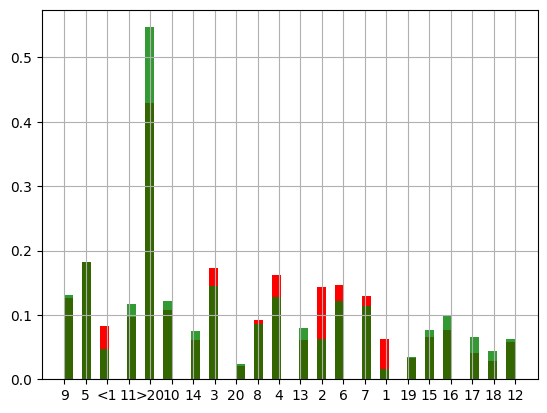

In [16]:
fig=pit.figure()
ax=fig.add_subplot(111)

df['experience'].hist(bins=50,ax=ax, density=True , color='red')
new_df['experience'].hist(bins=50,ax=ax, density=True , color='green',alpha=0.8)


In [26]:
temp=pd.concat(
    [
        df['enrolled_university'].value_counts()/len(df),
        new_df['enrolled_university'].value_counts()/len(new_df)
    ], axis=1
)
temp.columns=['orginal', 'cca']
temp

,orginal,cca
enrolled_university,,
no_enrollment,0.713481,0.830226
Full time course,0.204321,0.105986
Part time course,0.067637,0.063788


In [27]:
temp=pd.concat(
    [
        df['education_level'].value_counts()/len(df),
        new_df['education_level'].value_counts()/len(new_df)
    ], axis=1
)
temp.columns=['orginal', 'cca']
temp

,orginal,cca
education_level,,
Graduate,0.596054,0.684004
Masters,0.232973,0.285574
High School,0.104274,NaN
Phd,0.025364,0.030422
Primary School,0.016909,NaN
